In [6]:
import requests
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
import json
import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [50]:
stock_historical = pd.read_csv('/content/stock_historical.csv') #arquivo em Projeto de Pesquisa IC-ITA/S&P 500/Bases de dados/ENCITA

In [51]:
stock_historical.drop('0',axis='columns',inplace=True)

In [10]:
stock_historical.set_index('Date',inplace=True)

In [11]:
stock_historical_df = stock_historical.groupby(['Date','stock']).sum().reset_index().pivot(index='Date',columns='stock', values='Adj Close')

Método de normalização utilizado

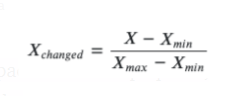

In [12]:
for column in stock_historical_df.columns:
  stock_historical_df[column] = (stock_historical_df[column]-min(stock_historical_df[column].dropna()))/(max(stock_historical_df[column].dropna())-min(stock_historical_df[column].dropna()))

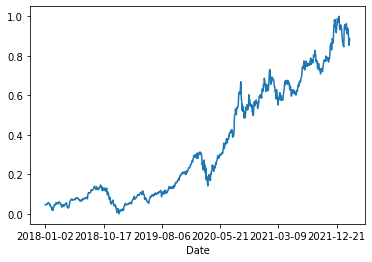

In [13]:
stock_historical_df['AAPL'].plot()

In [14]:
stock_historical_df

stock,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.051322,0.888607,0.177289,0.045284,0.262549,0.270757,0.194149,0.023816,0.058333,0.000000,...,0.758228,0.139648,0.735749,0.900521,0.114363,0.253692,0.416024,0.000000,0.439603,0.000786
2018-01-03,0.065282,0.875394,0.182850,0.045235,0.275906,0.275053,0.204580,0.025192,0.060666,0.006540,...,0.746851,0.131326,0.760218,0.894559,0.123998,0.252916,0.424515,0.004033,0.438559,0.002606
2018-01-04,0.061061,0.882102,0.205731,0.046532,0.270962,0.272476,0.215324,0.024134,0.066677,0.010809,...,0.752476,0.121704,0.761976,0.894300,0.129338,0.262124,0.422738,0.008124,0.442212,0.004978
2018-01-05,0.069989,0.881695,0.212566,0.049726,0.285968,0.286470,0.224941,0.025932,0.070915,0.014961,...,0.759443,0.113123,0.760950,0.918663,0.127828,0.267449,0.434981,0.011413,0.442560,0.009557
2018-01-08,0.071207,0.871125,0.207990,0.048672,0.271916,0.305867,0.242106,0.024134,0.075054,0.014373,...,0.745444,0.122224,0.766665,0.930586,0.130730,0.269002,0.437351,0.013546,0.438211,0.014411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,0.608369,0.184155,0.864096,0.901717,0.941377,0.983767,0.525843,0.725930,0.674638,0.518652,...,0.340242,0.819663,0.923525,0.634688,0.430922,0.851612,0.422823,0.619764,0.937370,0.687107
2022-02-22,0.595306,0.174979,0.792486,0.881488,0.957655,0.971361,0.520392,0.734093,0.674393,0.510506,...,0.309021,0.817915,0.906847,0.642717,0.422988,0.830940,0.442669,0.599111,0.940687,0.680206
2022-02-23,0.557710,0.158503,0.733247,0.852638,0.970422,0.956976,0.501723,0.731145,0.646629,0.492980,...,0.299791,0.788482,0.912592,0.643520,0.400281,0.801306,0.438700,0.578616,0.917664,0.663010


In [15]:
prices = stock_historical_df.copy()
prices.columns
prices.dropna(inplace=True)
retorno = prices.pct_change().dropna()
ativos = stock_historical_df.columns.to_list()

In [16]:
for column in retorno.columns:
  retorno[column] = retorno[column].mean()*252

In [17]:
import numpy as np
risco = retorno.copy()
for column in risco.columns:
  risco[column] = risco[column].var() * np.sqrt(252)

In [18]:
retorno_df = retorno[:1].T

In [19]:
retorno_df = retorno_df.reset_index().rename(columns={'2022-01-20':'return'})

In [20]:
risco_df = risco[:1].T

In [21]:
risco_df = risco_df.reset_index().rename(columns={'2022-01-20':'risk'})

In [22]:
kmeans_input = pd.merge(retorno_df.reset_index(),risco_df.reset_index(),how='inner',on='stock')

In [23]:
kmeans_input

Date,index_x,stock,return,index_y,risk
0,0,A,-0.663867,0,8.139806e-31
1,1,AAL,0.778412,1,8.139806e-31
2,2,AAP,-1.771491,2,3.255922e-30
3,3,AAPL,-0.009088,3,4.471329e-34
4,4,ABBV,1.642600,4,8.139806e-31
...,...,...,...,...,...
498,498,YUM,0.067646,498,2.861651e-32
499,499,ZBH,1.622076,499,1.302369e-29
500,500,ZBRA,-2.393778,500,1.302369e-29
501,501,ZION,1.283490,501,8.139806e-31


In [24]:
kmeans_input = kmeans_input[['stock','risk','return']]

In [25]:
kmeans_input['risk'] = kmeans_input['risk'].astype(float)
kmeans_input['return'] = kmeans_input['return'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
kmeans_input.sort_values('risk')

Date,stock,risk,return
502,ZTS,0.000000e+00,-0.373006
61,BIO,0.000000e+00,1.218123
458,UDR,0.000000e+00,-0.353394
459,UHS,0.000000e+00,2.379472
380,PSA,0.000000e+00,0.378329
...,...,...,...
467,VFC,1.172132e-28,-4.922905
281,LUMN,1.172132e-28,-4.027848
347,OGN,4.688528e-28,10.036234
60,BIIB,NaN,inf


In [27]:
kmeans_input.sort_values('return')

Date,stock,risk,return
386,PYPL,1.172132e-28,-7.274648
199,GILD,5.209476e-29,-6.263019
179,FB,1.302369e-29,-6.219799
467,VFC,1.172132e-28,-4.922905
304,MMM,0.000000e+00,-4.333873
...,...,...,...
226,HSIC,1.302369e-29,3.572406
441,TMUS,5.209476e-29,3.620403
347,OGN,4.688528e-28,10.036234
60,BIIB,NaN,inf


In [28]:
kmeans_input['risk'] = (kmeans_input['risk']-min(kmeans_input['risk'].dropna()))/(max(kmeans_input['risk'].dropna())-min(kmeans_input['risk'].dropna()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
kmeans_input = kmeans_input.loc[kmeans_input['return'].astype(float)<=1000]
kmeans_input['return'] = (kmeans_input['return']-min(kmeans_input['return'].dropna()))/(max(kmeans_input['return'].dropna())-min(kmeans_input['return'].dropna()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
kmeans_input = kmeans_input.loc[(kmeans_input['return'].astype(float)<1)]
kmeans_input = kmeans_input.loc[(kmeans_input['risk'].astype(float)<1)]

In [31]:
X = kmeans_input.iloc[:,[1,2]].values

In [32]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
X

array([[1.73611111e-03, 3.81885869e-01],
       [1.73611111e-03, 4.65202185e-01],
       [6.94444444e-03, 3.17901624e-01],
       [9.53674316e-07, 4.19710548e-01],
       [1.73611111e-03, 5.15123807e-01],
       [1.56250000e-02, 5.04560012e-01],
       [1.73611111e-03, 4.87042662e-01],
       [0.00000000e+00, 3.98655968e-01],
       [4.34027778e-04, 3.70265777e-01],
       [1.73611111e-03, 3.45558278e-01],
       [9.76562500e-04, 4.39096976e-01],
       [2.77777778e-02, 5.25249344e-01],
       [6.94444444e-03, 3.34546363e-01],
       [6.25000000e-02, 2.95647405e-01],
       [9.76562500e-04, 4.02121670e-01],
       [2.44140625e-04, 4.27583269e-01],
       [6.94444444e-03, 3.49628031e-01],
       [1.69542101e-06, 4.17982234e-01],
       [6.94444444e-03, 4.81085673e-01],
       [6.25000000e-02, 5.49729545e-01],
       [4.34027778e-04, 4.51663133e-01],
       [0.00000000e+00, 3.48441671e-01],
       [1.73611111e-03, 3.51457523e-01],
       [4.34027778e-04, 4.57097378e-01],
       [1.562500

In [34]:
WCSS = []

In [35]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

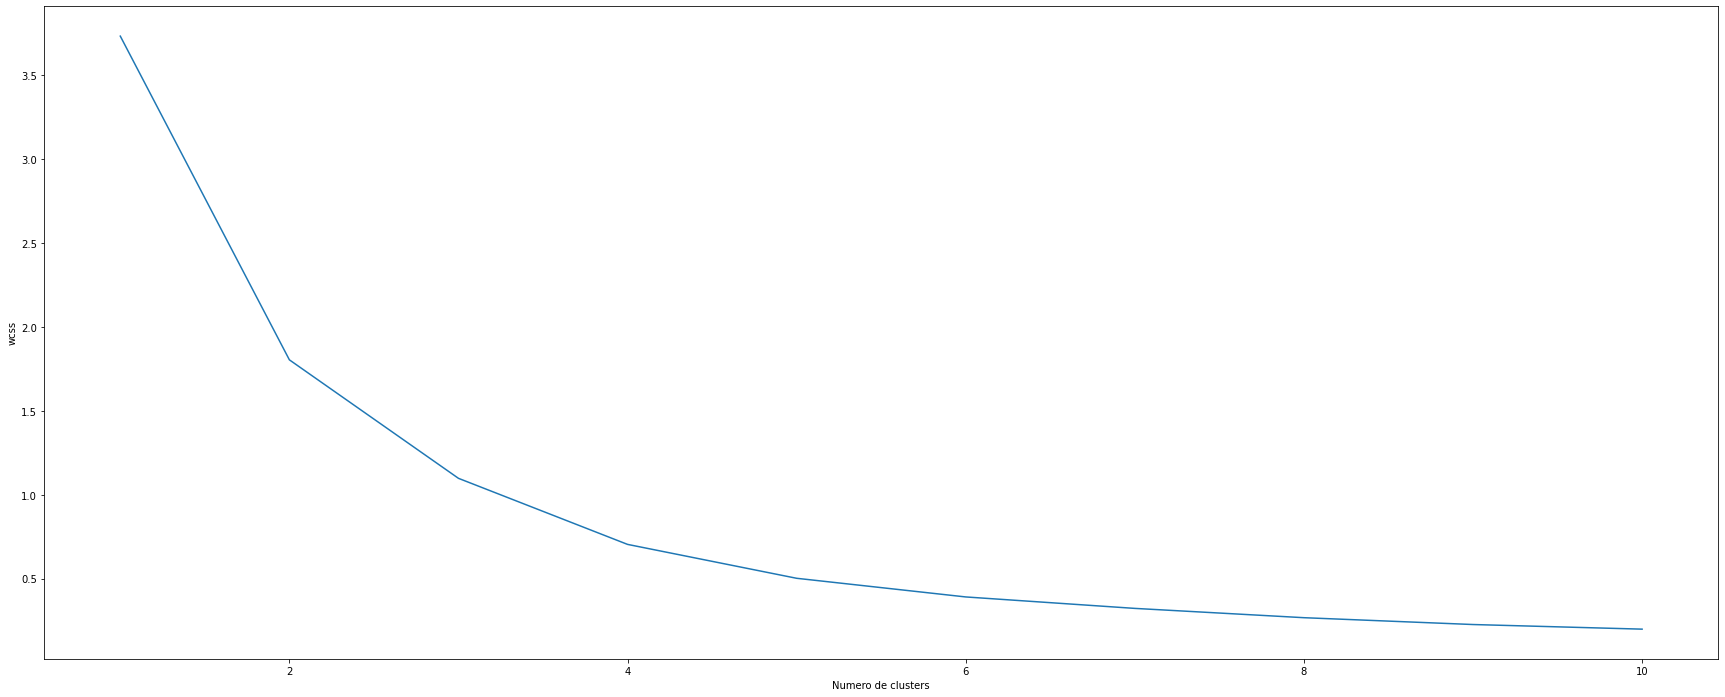

In [36]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [37]:
kmeans = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans.fit_predict(X)

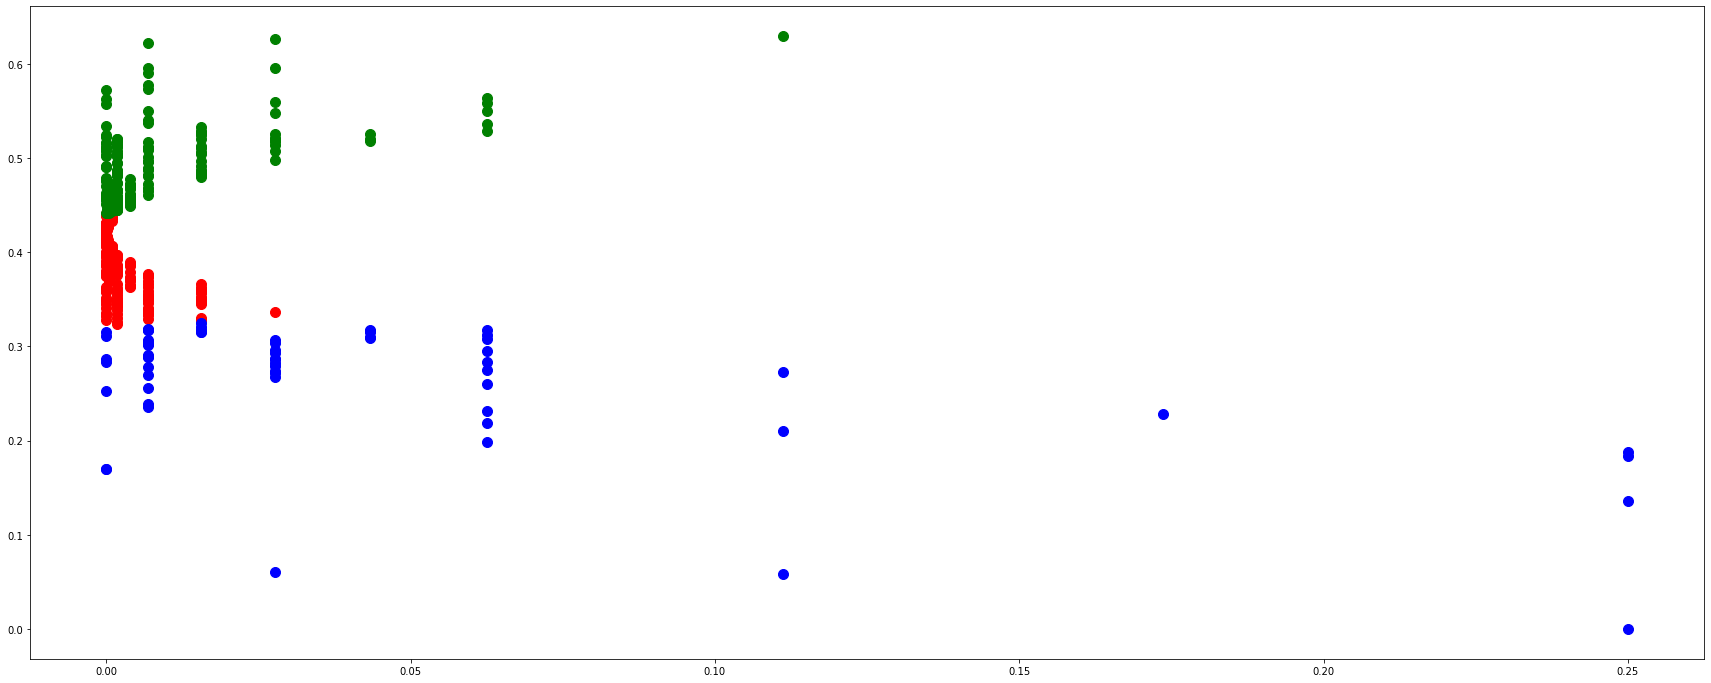

In [38]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
#plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')

In [39]:
centroides = pd.DataFrame(kmeans.cluster_centers_).reset_index()

In [40]:
centroides = centroides.rename(columns={0:'Var',1:'Return'})

In [41]:
centroides['Sharpe ratio'] = centroides['Return']/centroides['Var']

In [42]:
centroides

,index,Var,Return,Sharpe ratio
0,0,0.002108,0.391669,185.814537
1,1,0.008090,0.489929,60.561360
2,2,0.045580,0.266214,5.840609


In [43]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [44]:
kmeans_output

,0,1,2,3
0,A,0.001736,0.381886,0
1,AAL,0.001736,0.465202,1
2,AAP,0.006944,0.317902,2
3,AAPL,0.000001,0.419711,0
4,ABBV,0.001736,0.515124,1
...,...,...,...,...
495,YUM,0.000061,0.424143,0
496,ZBH,0.027778,0.513938,1
497,ZBRA,0.027778,0.281954,2
498,ZION,0.001736,0.494379,1


In [45]:
kmeans_output = kmeans_output.rename(columns={0:'Stock',1:'Var',2:'Return',3:'Cluster'})

In [46]:
sharpe = kmeans_output.groupby('Cluster').mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
sharpe['Sharpe ratio'] = sharpe['Return']/sharpe['Var']

In [48]:
sharpe

,Var,Return,Sharpe ratio
Cluster,,,
0,0.002100,0.391860,186.628749
1,0.008135,0.490202,60.258459
2,0.045580,0.266214,5.840609


In [49]:
kmeans_output.loc[kmeans_output['Cluster'].astype(str)=='0']['Stock'].drop_duplicates()

0         A
3      AAPL
7       ABT
8       ACN
9      ADBE
       ... 
488     WTW
490    WYNN
491     XEL
495     YUM
499     ZTS
Name: Stock, Length: 258, dtype: object